# **Deep learning Regression Model to predict Molecular Properties for Drug Discovery**

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
# Step 2: Load Dataset
df = pd.read_csv("/content/descriptor_list.csv")

# Preview dataset
print(df.head())
print(df.info())


     CID      MW  NHA  NHD   TPSA  NROT  NRING  MAXRING  NHET  NRIG  ...  \
0   3902  285.10    5    0  78.29     3      3        6     5    19  ...   
1   5407  300.17    3    0  43.37     0      4       18     3    23  ...   
2   5743  392.20    5    3  94.83     2      4       17     6    22  ...   
3   9782  392.20    5    3  94.83     2      4       17     6    22  ...   
4  13769  300.17    3    0  43.37     0      4       18     3    23  ...   

   PUBCHEMFP779  PUBCHEMFP797  PUBCHEMFP798  PUBCHEMFP800  PUBCHEMFP818  \
0             0             0             0             0             0   
1             0             1             1             0             1   
2             0             1             1             0             1   
3             0             1             1             0             1   
4             0             1             1             0             1   

   PUBCHEMFP821  PUBCHEMFP839  PUBCHEMFP840  PUBCHEMFP860  PUBCHEMFP861  
0             0   

In [ ]:
# Step 3: Features and Target
X = df.drop(columns=["MLogP"])   # features
y = df["MLogP"]                  # target


In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 5: Build Deep Learning Model
model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')   # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       212,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,209 (993.00 KB)

 Trainable params: 254,209 (993.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train Model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=95,
    verbose=1
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0074 - mae: 0.0644 - val_loss: 0.1210 - val_mae: 0.2846
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0068 - mae: 0.0628 - val_loss: 0.1402 - val_mae: 0.3063
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0063 - mae: 0.0594 - val_loss: 0.1723 - val_mae: 0.3382
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0101 - mae: 0.0714 - val_loss: 0.1583 - val_mae: 0.3239
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0074 - mae: 0.0649 - val_loss: 0.1624 - val_mae: 0.3277
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0080 - mae: 0.0672 - val_loss: 0.1442 - val_mae: 0.3095
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0079 - mae: 0.0661 - val_loss: 0.1324 - val_mae: 0.2965
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0076 - mae: 0.0616 - val_loss: 0.1454 - val_mae: 0.3103
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0093 - mae: 

In [ ]:
# Step 7: Evaluate Model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
RMSE: 0.306
R²: 0.843


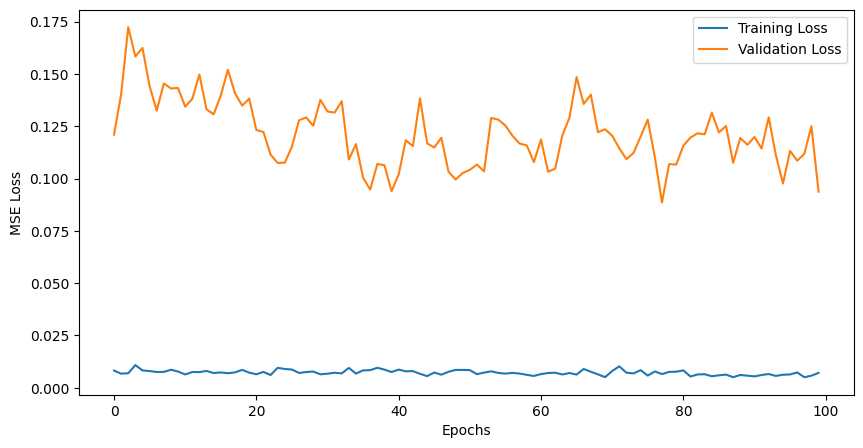

In [ ]:
# Step 8: Plot Training Performance
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


**hyperparameter tuning so we can find the best neural network architecture for predicting MLogP**

In [ ]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.7 MB/s eta 0:00:00


In [ ]:
#Define HyperModel
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=64, max_value=512, step=64),
        activation=hp.Choice('activation_1', values=['relu', 'tanh']),
        input_dim=X_train_scaled.shape[1]
    ))

    # Dropout
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_2', values=['relu', 'tanh'])
    ))

    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    return model


**Run Hyperparameter Search**

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,   # try 10 different combinations
    executions_per_trial=2,
    directory='mlogp_tuning',
    project_name='drug_discovery'
)

tuner.search(X_train_scaled, y_train,
             validation_data=(X_test_scaled, y_test),
             epochs=50,
             batch_size=32,
             verbose=1)


Trial 10 Complete [00h 00m 31s]
val_loss: 0.08517398498952389

Best val_loss So Far: 0.0367929320782423
Total elapsed time: 00h 05m 10s


Get Best Model

In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

print("Best hyperparameters:", best_hyperparameters.values)

# Evaluate best model
y_pred_best = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print(f"Best Model RMSE: {rmse:.3f}")
print(f"Best Model R²: {r2:.3f}")


Visualize Tuning Results

In [ ]:
# Get the results summary
tuner.results_summary()

# Extract trials and validation losses
import pandas as pd

trials = tuner.oracle.get_best_trials(num_trials=10)
results = []

for t in trials:
    results.append({
        "trial_id": t.trial_id,
        "val_loss": t.metrics.get_last_value("val_loss"),
        **t.hyperparameters.values
    })

results_df = pd.DataFrame(results)
print(results_df)


Visualize Predictions of Best Model

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True MLogP")
plt.ylabel("Predicted MLogP")
plt.title("Best Model Predictions vs Actual")
plt.show()
